<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


EX-1 N QUEENS PROBLEM

In [6]:
def isSafe(mat, r, c):
    # Check if any queen is in the same column
    for i in range(r):
        if mat[i][c] == 'Q':
            return False

    # Check upper-left diagonal
    (i, j) = (r, c)
    while i >= 0 and j >= 0:
        if mat[i][j] == 'Q':
            return False
        i = i - 1
        j = j - 1

    # Check upper-right diagonal
    (i, j) = (r, c)
    while i >= 0 and j < len(mat):
        if mat[i][j] == 'Q':
            return False
        i = i - 1
        j = j + 1

    return True


def printSolution(mat):
    for r in mat:
        print(' '.join(r))
    print()


def nQueen(mat, r):
    # Base case: All queens are placed
    if r == len(mat):
        printSolution(mat)
        return

    # Try placing queen in each column of the current row
    for i in range(len(mat)):
        if isSafe(mat, r, i):
            mat[r][i] = 'Q'  # Place queen
            nQueen(mat, r + 1)  # Recur for the next row
            mat[r][i] = '–'  # Backtrack


if __name__ == '__main__':
    N = int(input("Enter the number of Queens you want: "))
    mat = [['–' for x in range(N)] for y in range(N)]
    nQueen(mat, 0)

Enter the number of Queens you want: 4
– Q – –
– – – Q
Q – – –
– – Q –

– – Q –
Q – – –
– – – Q
– Q – –



EX-2 DEPTH FIRST SEARCH

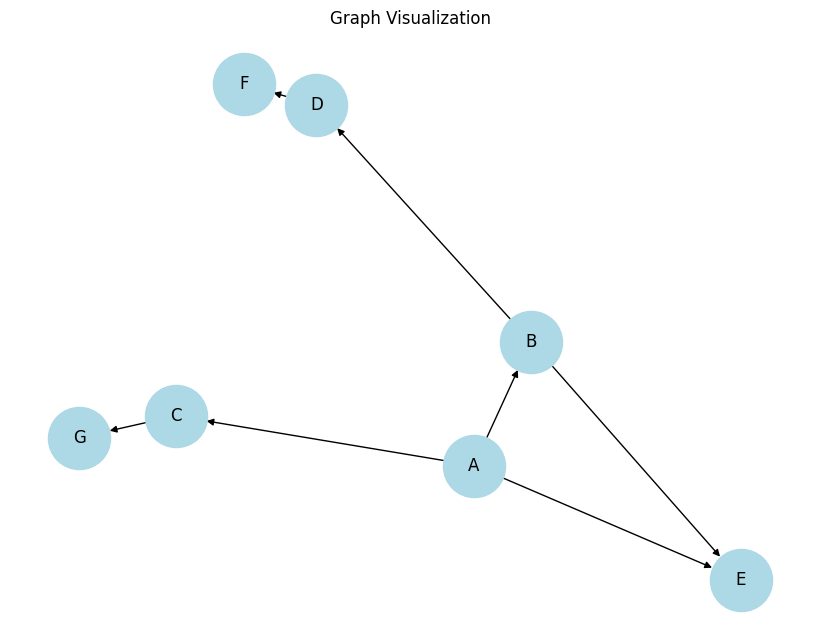

Following is DFS from (starting from vertex A):
A B D F E C G 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# FUNCTION TO SOLVE DFS
def solveDFS(graph, v, visited):
    visited.add(v)  # Mark the current node as visited
    print(v, end=' ')  # Print the current node

    for neighbour in graph.neighbors(v):  # Iterate through the neighbors of the current node
        if neighbour not in visited:  # Visit unvisited neighbors
            solveDFS(graph, neighbour, visited)

# CREATE A GRAPH USING NETWORKX
g = nx.DiGraph()  # Create a directed graph
g.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('C', 'G'),
    ('B', 'D'), ('B', 'E'), ('D', 'F'), ('A', 'E')
])  # Add edges for the graph

# GRAPH VISUALIZATION
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
nx.draw(g, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_color='black')
plt.title("Graph Visualization")
plt.show()

# SOLVE DFS FOR THE GRAPH
print("Following is DFS from (starting from vertex A):")
visited = set()  # Create a set to keep track of visited nodes
solveDFS(g, 'A', visited)


EX-3 DEPTH FIRST SEARCH (WATER JUG)

Solution steps:
(0, 0)
(3, 0)
(3, 5)
(0, 5)
(3, 2)
(0, 2)
(2, 0)
(2, 5)
(3, 4)


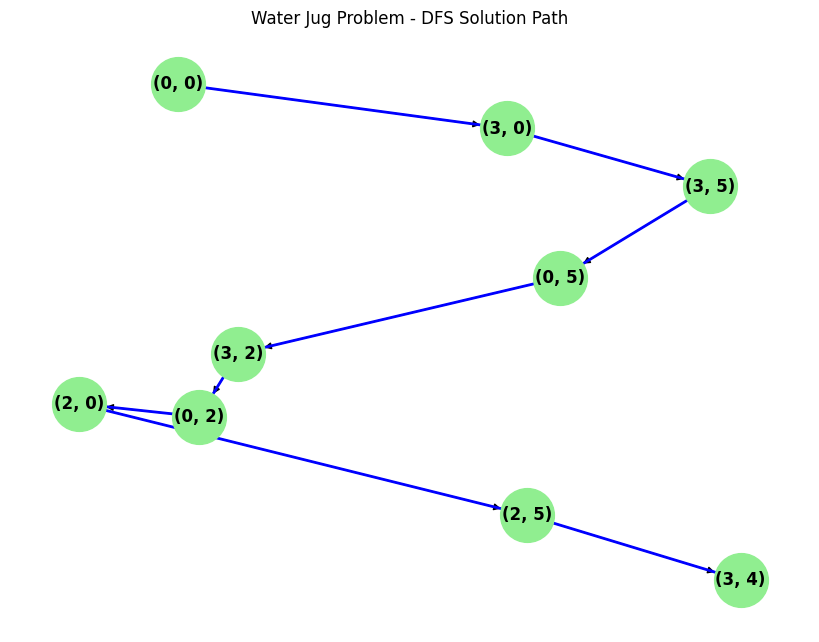

In [ ]:
# Function to perform DFS to solve the water jug problem
def water_jug_dfs(capacity1, capacity2, target):
    visited = set()  # To track visited states
    path = []  # To store the solution path

    def dfs(jug1, jug2):
        # If we have already visited this state, return False (avoid cycles)
        if (jug1, jug2) in visited:
            return False

        # Mark the state as visited
        visited.add((jug1, jug2))

        # Append the current state to the path
        path.append((jug1, jug2))

        # If the target is achieved in either jug, return True
        if jug1 == target or jug2 == target:
            return True

        # Explore all possible transitions (DFS recursive calls)
        # Fill 3-liter jug
        if dfs(3, jug2):
            return True
        # Fill 5-liter jug
        if dfs(jug1, 5):
            return True
        # Empty 3-liter jug
        if dfs(0, jug2):
            return True
        # Empty 5-liter jug
        if dfs(jug1, 0):
            return True
        # Pour water from 3-liter jug into 5-liter jug
        if dfs(max(0, jug1 - (5 - jug2)), min(5, jug1 + jug2)):
            return True
        # Pour water from 5-liter jug into 3-liter jug
        if dfs(min(3, jug1 + jug2), max(0, jug2 - (3 - jug1))):
            return True

        # If none of the transitions lead to the goal, backtrack
        path.pop()
        return False

    # Start DFS from the initial state (0, 0)
    dfs(0, 0)

    # If we found a solution, return the path
    return path

# Example Usage
capacity1 = 3  # Capacity of the 3-liter jug
capacity2 = 5  # Capacity of the 5-liter jug
target = 4     # Target amount to measure

solution = water_jug_dfs(capacity1, capacity2, target)

if solution:
    print("Solution steps:")
    for step in solution:
        print(step)
else:
    print("No solution found.")

import matplotlib.pyplot as plt
import networkx as nx

# Function to create and visualize the state space transitions for DFS
def visualize_dfs_solution(solution):
    G = nx.DiGraph()

    # Add the nodes and edges based on the DFS solution path
    for i in range(len(solution) - 1):
        G.add_edge(solution[i], solution[i + 1])

    pos = nx.spring_layout(G)  # Position the nodes for visualization

    plt.figure(figsize=(8, 6))

    # Draw the graph with nodes and labels
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=list(G.edges()), edge_color='blue', width=2)

    plt.title("Water Jug Problem - DFS Solution Path")
    plt.show()

# Visualize the DFS solution
if solution:
    visualize_dfs_solution(solution)

<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  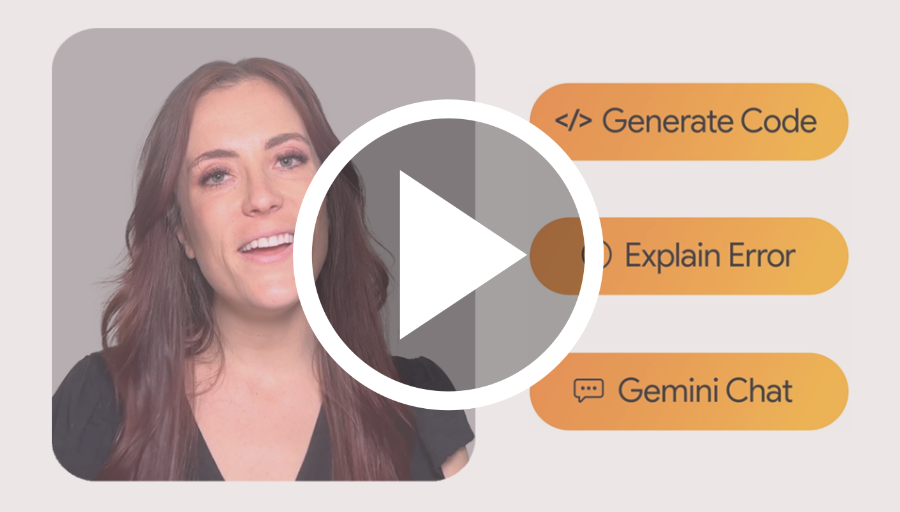
  </a>
</center>

EX -4 MINIMAX PROBLEM

In [7]:
# A simple Python3 program to find
# maximum score that
# maximizing player can get
import math

def minimax (curDepth, nodeIndex,
			maxTurn, scores,
			targetDepth):

	# base case : targetDepth reached
	if (curDepth == targetDepth):
		return scores[nodeIndex]

	if (maxTurn):
		return max(minimax(curDepth + 1, nodeIndex * 2,
					False, scores, targetDepth),
				minimax(curDepth + 1, nodeIndex * 2 + 1,
					False, scores, targetDepth))

	else:
		return min(minimax(curDepth + 1, nodeIndex * 2,
					True, scores, targetDepth),
				minimax(curDepth + 1, nodeIndex * 2 + 1,
					True, scores, targetDepth))

# Driver code
scores = [3, 5, 2, 9, 12, 5, 23, 23]

treeDepth = math.log(len(scores), 2)

print("The optimal value is : ", end = "")
print(minimax(0, 0, True, scores, treeDepth))

# This code is contributed
# by rootshadow

The optimal value is : 12


EX -5 A * SEARCH PROBLEM


In [8]:
import heapq

ROW, COL = 9, 10

def is_valid(row, col):
    return 0 <= row < ROW and 0 <= col < COL

def is_unblocked(grid, row, col):
    return grid[row][col] == 1

def is_destination(row, col, dest):
    return (row, col) == dest

def calculate_h_value(row, col, dest):
    return ((row - dest[0])**2 + (col - dest[1])**2)**0.5

def trace_path(parent, dest):
    path = []
    while dest in parent:
        path.append(dest)
        dest = parent[dest]
    print("Path:", " -> ".join(map(str, path[::-1])))

def a_star_search(grid, src, dest):
    if not (is_valid(*src) and is_valid(*dest)):
        print("Invalid source or destination")
        return
    if not (is_unblocked(grid, *src) and is_unblocked(grid, *dest)):
        print("Source or destination blocked")
        return

    open_list = [(0, src)]
    parent = {}
    g_score = {src: 0}

    while open_list:
        _, current = heapq.heappop(open_list)

        if is_destination(*current, dest):
            trace_path(parent, dest)
            return

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if is_valid(*neighbor) and is_unblocked(grid, *neighbor):
                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + calculate_h_value(*neighbor, dest)
                    heapq.heappush(open_list, (f_score, neighbor))
                    parent[neighbor] = current

    print("Path not found")

# Driver code
if __name__ == "__main__":
    grid = [
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
    ]
    src = (8, 0)
    dest = (0, 0)
    a_star_search(grid, src, dest)


Path: (7, 0) -> (6, 0) -> (5, 0) -> (4, 1) -> (3, 2) -> (2, 1) -> (1, 0) -> (0, 0)


EX-6 PROLOG


In [9]:

def prolog_response(result):
    if result is True:
        return "true."
    elif result is False:
        return "false."
    else:
        return f"ERROR: Unknown procedure: {result}"


def kb1():
    print("?- woman(mia).")
    print(prolog_response("mia" in {"mia", "jody", "yolanda"}))

    print("?- playsAirGuitar(mia).")
    print(prolog_response("mia" in {"jody"}))

    print("?- party.")
    print(prolog_response(True))

    print("?- concert.")
    print(prolog_response("concert"))

kb1()


def kb2():
    happy = {"yolanda"}
    listens_to_music = {"mia"}

    if "yolanda" in happy:
        listens_to_music.add("yolanda")

    plays_air_guitar = set()
    if "mia" in listens_to_music:
        plays_air_guitar.add("mia")
    if "yolanda" in listens_to_music:
        plays_air_guitar.add("yolanda")

    print("KB2 Plays Air Guitar:", plays_air_guitar)

kb2()


def kb3():
    likes = {
        ("dan", "sally"),
        ("sally", "dan"),
        ("john", "brittney")
    }

    def married(x, y):
        return (x, y) in likes and (y, x) in likes

    def friends(x, y):
        return (x, y) in likes or (y, x) in likes

    print("KB3 Married (Dan, Sally):", married("dan", "sally"))
    print("KB3 Friends (John, Brittney):", friends("john", "brittney"))

kb3()


def kb4():
    foods = {"burger", "sandwich", "pizza"}
    lunch = "sandwich"
    dinner = "pizza"

    def is_food(item):
        return item in foods

    print("KB4 Is Burger Food?:", is_food("burger"))
    print("KB4 Is Sandwich Food?:", is_food("sandwich"))
    print("KB4 Is Pizza Food?:", is_food("pizza"))

kb4()


def kb5():
    owns = {
        "jack": "car(bmw)",
        "john": "car(chevy)",
        "olivia": "car(civic)",
        "jane": "car(chevy)"
    }
    sedan = {"car(bmw)", "car(civic)"}
    truck = {"car(chevy)"}

    def is_sedan(car):
        return car in sedan

    def is_truck(car):
        return car in truck

    print("KB5 Jack owns a sedan:", is_sedan(owns["jack"]))
    print("KB5 John owns a truck:", is_truck(owns["john"]))
    print("KB5 Olivia owns a sedan:", is_sedan(owns["olivia"]))

kb5()


?- woman(mia).
true.
?- playsAirGuitar(mia).
false.
?- party.
true.
?- concert.
ERROR: Unknown procedure: concert
KB2 Plays Air Guitar: {'mia', 'yolanda'}
KB3 Married (Dan, Sally): True
KB3 Friends (John, Brittney): True
KB4 Is Burger Food?: True
KB4 Is Sandwich Food?: True
KB4 Is Pizza Food?: True
KB5 Jack owns a sedan: True
KB5 John owns a truck: True
KB5 Olivia owns a sedan: True


EX-7 INTRODUCTION TO PROLOG

In [10]:

male = {"peter", "john", "chris", "kevin"}
female = {"betty", "jeny", "lisa", "helen"}
parentOf = {
    ("chris", "peter"),
    ("chris", "betty"),
    ("helen", "peter"),
    ("helen", "betty"),
    ("kevin", "chris"),
    ("kevin", "lisa"),
    ("jeny", "john"),
    ("jeny", "helen")
}


def prolog_response(result):
    if result:
        return "true."
    else:
        return "false."


def father(x, y):
    return y in male and (x, y) in parentOf

def mother(x, y):
    return y in female and (x, y) in parentOf

def grandfather(x, y):
    for z in parentOf:
        if (x, z[0]) in parentOf and (z[0], y) in parentOf and z[0] in male:
            return True
    return False

def grandmother(x, y):
    for z in parentOf:
        if (x, z[0]) in parentOf and (z[0], y) in parentOf and z[0] in female:
            return True
    return False

def brother(x, y):
    for z in parentOf:
        if y in male and (x, z[1]) in parentOf and (y, z[1]) in parentOf:
            return True
    return False

def sister(x, y):
    for z in parentOf:
        if y in female and (x, z[1]) in parentOf and (y, z[1]) in parentOf:
            return True
    return False


print("?- father('chris', 'peter').")
print(prolog_response(father("chris", "peter")))

print("?- mother('helen', 'peter').")
print(prolog_response(mother("helen", "peter")))

print("?- grandfather('kevin', 'peter').")
print(prolog_response(grandfather("kevin", "peter")))

print("?- grandmother('jeny', 'helen').")
print(prolog_response(grandmother("jeny", "helen")))

print("?- brother('peter', 'betty').")
print(prolog_response(brother("peter", "betty")))

print("?- sister('betty', 'peter').")
print(prolog_response(sister("betty", "peter")))


?- father('chris', 'peter').
true.
?- mother('helen', 'peter').
false.
?- grandfather('kevin', 'peter').
true.
?- grandmother('jeny', 'helen').
false.
?- brother('peter', 'betty').
false.
?- sister('betty', 'peter').
false.


EX-8 UNIFICATION AND RESOLUTION

In [11]:

warm = True
raining = True
sunny = True

def wet():
    return raining

def enjoy():
    return sunny and warm

def strawberry_picking():
    return warm and not raining

def notstrawberry_picking():
    return raining


def prolog_response(result):
    if result:
        return "true."
    else:
        return "false."


print("?- enjoy.")
print(prolog_response(enjoy()))

print("?- strawberry_picking.")
print(prolog_response(strawberry_picking()))

print("?- notstrawberry_picking.")
print(prolog_response(notstrawberry_picking()))

print("?- wet.")
print(prolog_response(wet()))


?- enjoy.
true.
?- strawberry_picking.
false.
?- notstrawberry_picking.
true.
?- wet.
true.


EX-9 FUZZY LOGIC (IMAGE PROCESSING)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.1 MB/s eta 0:00:00


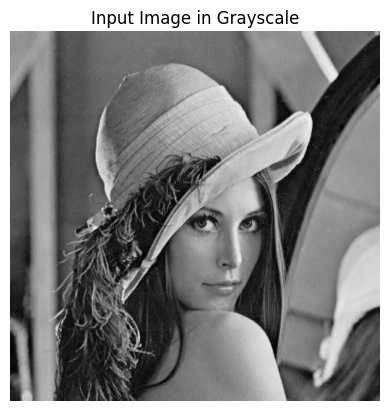

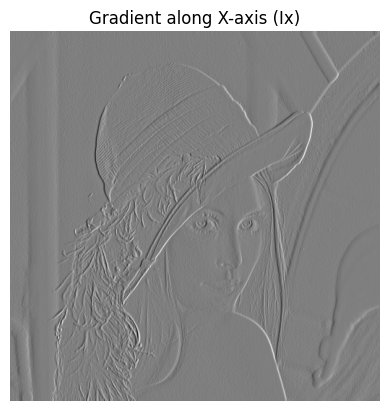

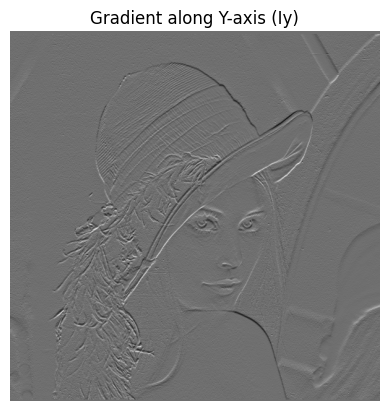

KeyboardInterrupt: 

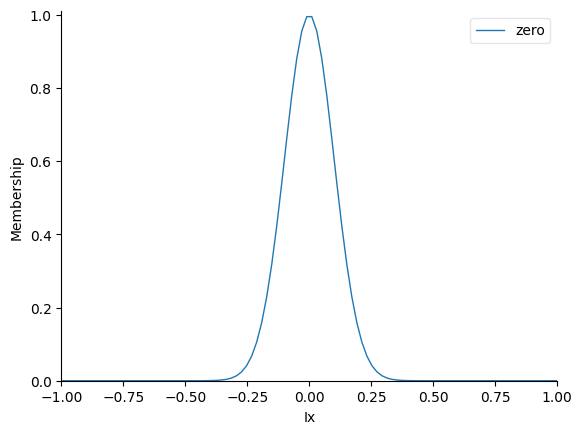

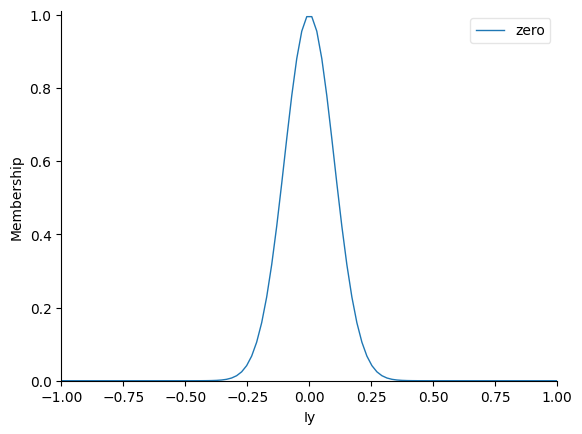

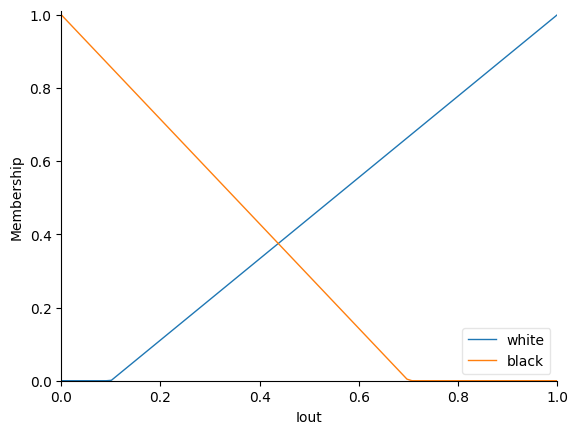

In [12]:
!pip install scikit-image scikit-fuzzy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from scipy.ndimage import convolve
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Load an example image
image_rgb = io.imread('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')

# Convert to grayscale
image_gray = color.rgb2gray(image_rgb)
plt.figure()
plt.imshow(image_gray, cmap='gray')
plt.title('Input Image in Grayscale')
plt.axis('off')
plt.show()

image_double = img_as_float(image_gray)

# Define gradient filters
Gx = np.array([[-1, 1]])
Gy = np.array([[-1], [1]])

# Convolve to get gradients
Ix = convolve(image_double, Gx, mode='reflect')
Iy = convolve(image_double, Gy, mode='reflect')

# Display gradients
plt.figure()
plt.imshow(Ix, cmap='gray')
plt.title('Gradient along X-axis (Ix)')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(Iy, cmap='gray')
plt.title('Gradient along Y-axis (Iy)')
plt.axis('off')
plt.show()

# Create fuzzy variables
Ix_fuzzy = ctrl.Antecedent(np.linspace(-1, 1, 100), 'Ix')
Iy_fuzzy = ctrl.Antecedent(np.linspace(-1, 1, 100), 'Iy')
Iout_fuzzy = ctrl.Consequent(np.linspace(0, 1, 100), 'Iout')

# Define membership functions
Ix_fuzzy['zero'] = fuzz.gaussmf(Ix_fuzzy.universe, 0, 0.1)
Iy_fuzzy['zero'] = fuzz.gaussmf(Iy_fuzzy.universe, 0, 0.1)
Iout_fuzzy['white'] = fuzz.trimf(Iout_fuzzy.universe, [0.1, 1, 1])
Iout_fuzzy['black'] = fuzz.trimf(Iout_fuzzy.universe, [0, 0, 0.7])

# Plot membership functions
Ix_fuzzy.view()
Iy_fuzzy.view()
Iout_fuzzy.view()

rule1 = ctrl.Rule(Ix_fuzzy['zero'] & Iy_fuzzy['zero'], Iout_fuzzy['white'])
rule2 = ctrl.Rule(~(Ix_fuzzy['zero'] & Iy_fuzzy['zero']), Iout_fuzzy['black'])

# Create control system
edge_detection_ctrl = ctrl.ControlSystem([rule1, rule2])
edge_detection = ctrl.ControlSystemSimulation(edge_detection_ctrl)

edge_image = np.zeros_like(image_double)
for i in range(Ix.shape[0]):
    for j in range(Ix.shape[1]):
        edge_detection.input['Ix'] = Ix[i, j]
        edge_detection.input['Iy'] = Iy[i, j]
        edge_detection.compute()
        edge_image[i, j] = edge_detection.output['Iout']

# Display original and edge-detected images
plt.figure()
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(edge_image, cmap='gray')
plt.title('Edge Detection Using Fuzzy Logic')
plt.axis('off')
plt.show()

EX-10 IMPLEMENTING ARTIFICIAL NEURAL NETWORKS FOR AN
APPLICATION USING PYTHON - CLASSIFICATION


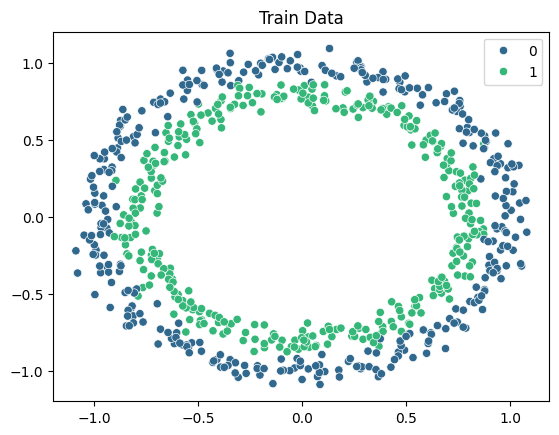

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 Score for Training Data = 0.98
R2 Score for Test Data = 0.98


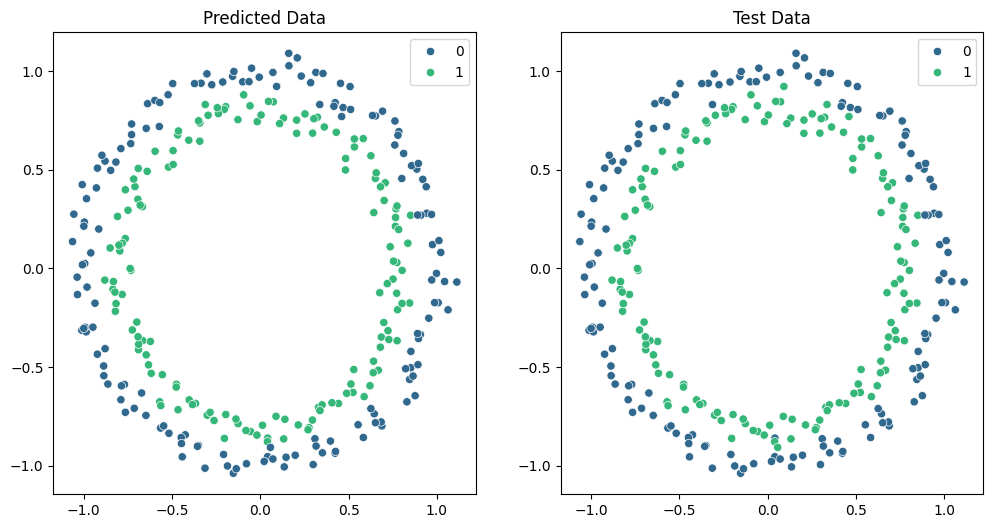

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

X_train, y_train = make_circles(n_samples=700, noise=0.05)
X_test, y_test = make_circles(n_samples=300, noise=0.05)


sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="viridis")
plt.title("Train Data")
plt.show()

clf = MLPClassifier(max_iter=1000)
clf.fit(X_train, y_train)

print(f"R2 Score for Training Data = {clf.score(X_train, y_train):.2f}")
print(f"R2 Score for Test Data = {clf.score(X_test, y_test):.2f}")

y_pred = clf.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette="viridis", ax=ax[0])
ax[0].set_title("Predicted Data")

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette="viridis", ax=ax[1])
ax[1].set_title("Test Data")

plt.show()


EX-11 IMPLEMENTING ARTIFICIAL NEURAL NETWORKS FOR AN
APPLICATION USING PYTHON - REGRESSION

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

X, y = make_regression(n_samples=1000, noise=0.05, n_features=100)
print("Shapes of X and y:", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

clf = MLPRegressor(max_iter=1000)
clf.fit(X_train, y_train)

print(f"R2 Score for Training Data = {clf.score(X_train, y_train):.2f}")
print(f"R2 Score for Test Data = {clf.score(X_test, y_test):.2f}")


Shapes of X and y: (1000, 100) (1000,)
R2 Score for Training Data = 1.00
R2 Score for Test Data = 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# EX-12 DECISION TREE CLASSIFICATION

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from google.colab import files

uploaded = files.upload()

dataset = pd.read_csv('customers-100.csv')

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


Saving customers-100.csv to customers-100.csv


ValueError: could not convert string to float: 'Brady'

# EX-13 IMPLEMENTATION OF DECISION TREE CLASSIFICATION TECHNIQUES

In [ ]:
from sklearn import tree


clf = tree.DecisionTreeClassifier()


X = [[181, 80, 91], [182, 90, 92], [183, 100, 92], [184, 200, 93], [185, 300, 94], [186, 400, 95],
     [187, 500, 96], [189, 600, 97], [190, 700, 98], [191, 800, 99], [192, 900, 100], [193, 1000, 101]]

Y = ['male', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male']

clf = clf.fit(X, Y)


predictionf = clf.predict([[181, 80, 91]])
predictionm = clf.predict([[183, 100, 92]])


print(predictionf)
print(predictionm)


['male']
['female']


# EX-14 IMPLEMENTATION OF CLUSTERING TECHNIQUES K - MEANS

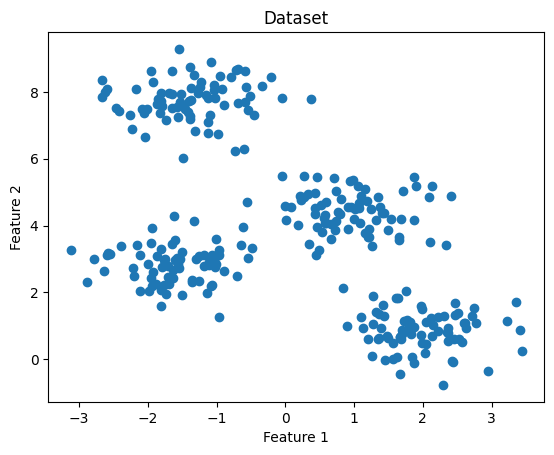

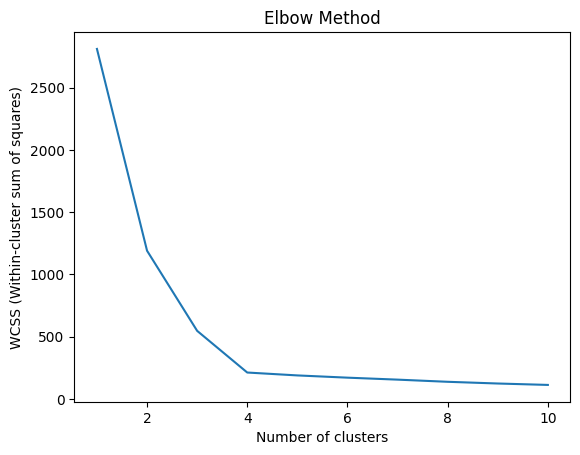

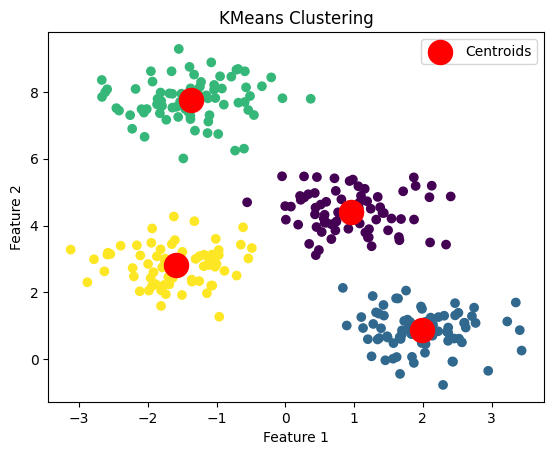

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans


X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


plt.scatter(X[:, 0], X[:, 1])
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred_y, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

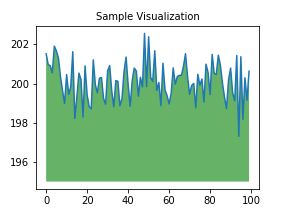

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
